In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_02a19b91d9ab42209d155b4fc55b6e06 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='RipgDfc9XMWwJ3BJrt3ytiRK1YQX2UGq8xcackLFeWnP',
    ibm_auth_endpoint="https://iam.au-syd.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_02a19b91d9ab42209d155b4fc55b6e06.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-frkbsmnoqrh2ai',Key='uscities.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [3]:
df_data_1.shape

(28889, 19)

<h3>Segmenting Washington state information</h3> 

In [4]:
df_data_1.rename(columns={'state_id': 'State', 'county_name':'County', 'county_fips':'CountyCode', 'city':'Neighborhood'}, inplace=True)
df_data_1.head()

,Neighborhood,city_ascii,State,state_name,CountyCode,County,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [5]:

WA_data = df_data_1[df_data_1.State == 'WA']
WA_data.head()

,Neighborhood,city_ascii,State,state_name,CountyCode,County,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [6]:
# Slice the data based on what is needed


cols = [0,2,11,5,8,9]
WA_data = WA_data[WA_data.columns[cols]]
WA_data.head()

,Neighborhood,State,density,County,lat,lng
0,South Creek,WA,125.0,Pierce,46.9994,-122.3921
1,Roslyn,WA,84.0,Kittitas,47.2507,-121.0989
2,Sprague,WA,163.0,Lincoln,47.3048,-117.9713
3,Gig Harbor,WA,622.0,Pierce,47.3352,-122.5968
4,Lake Cassidy,WA,131.0,Snohomish,48.0639,-122.0920


In [7]:
WA_data=WA_data.rename(columns={"lat":"Latitude","lng":"Longitude"})

In [8]:
WA_data.head(10)

,Neighborhood,State,density,County,Latitude,Longitude
0,South Creek,WA,125.0,Pierce,46.9994,-122.3921
1,Roslyn,WA,84.0,Kittitas,47.2507,-121.0989
2,Sprague,WA,163.0,Lincoln,47.3048,-117.9713
3,Gig Harbor,WA,622.0,Pierce,47.3352,-122.5968
4,Lake Cassidy,WA,131.0,Snohomish,48.0639,-122.0920
5,Tenino,WA,491.0,Thurston,46.8537,-122.8607
6,Jamestown,WA,191.0,Clallam,48.1229,-123.0911
7,Three Lakes,WA,112.0,Snohomish,47.9420,-121.9924
8,Curlew Lake,WA,50.0,Ferry,48.7311,-118.6663
9,Chain Lake,WA,156.0,Snohomish,47.9038,-121.9861


In [9]:
WA_data.shape
print('The dataframe has', WA_data.shape, 'rows and columns respectively.')

The dataframe has (620, 6) rows and columns respectively.


<h3> lets determine the address of one location in Washington State, USA.</h3>

In [10]:

address = '86 Pike Pl, Seattle, WA 98101'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 86 Pike Pl, Seattle, WA 98101  is {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of 86 Pike Pl, Seattle, WA 98101  is 47.60866075, -122.3406845.


<h3>Let's install and import FOLIUM for our purpose</h3>
It is a great visualization library.

In [11]:

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [12]:
# create map of Seattle using latitude and longitude values
map = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, city, county in zip(WA_data['Latitude'], WA_data['Longitude'], WA_data['Neighborhood'], WA_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

In [13]:
map.save('SeattleAreaGrab.png',format='png')
map.save('map.html')

In [14]:
from folium.plugins import MarkerCluster
seattle_map = folium.Map(location=[WA_data['Latitude'].mean(), WA_data['Longitude'].mean()], zoom_start=6
                    )
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in WA_data.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
                 popup=row.Neighborhood)) 
seattle_map.add_child(mc)
seattle_map

<h2> Segmenting King County </h2>
Let's simplify the above map and segment and clusters only the neighborhoods in King County. So let's slice the original dataframe and create a new dataframe of the King County data.

In [15]:
king_data = WA_data[WA_data.County == 'King']
king_data.drop(king_data.index[2], inplace=True)
print('The dataframe has', king_data.shape, 'rows and columns respectively.')
king_data.reset_index()

The dataframe has (61, 6) rows and columns respectively.


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Neighborhood,State,density,County,Latitude,Longitude
0,71,Vashon,WA,100.0,King,47.4122,-122.4726
1,91,Shoreline,WA,1864.0,King,47.7564,-122.3426
2,106,Seattle,WA,3336.0,King,47.6211,-122.3244
3,108,Carnation,WA,725.0,King,47.6446,-121.9048
4,118,Newcastle,WA,1014.0,King,47.5303,-122.1633
5,131,Lakeland North,WA,1452.0,King,47.3374,-122.2814
6,141,Tukwila,WA,847.0,King,47.4748,-122.2727
7,149,Bellevue,WA,1666.0,King,47.5953,-122.1550
8,162,Beaux Arts Village,WA,1524.0,King,47.5854,-122.2009
9,168,Bryn Mawr-Skyway,WA,2500.0,King,47.4949,-122.2411


<h3> Now let's find the geographical coordinates for King County, WA</h3>

In [17]:
address = 'King, WA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of King, WA are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinates of King, WA are 47.4873376, -121.8622122.


<h3> Visualizing King County Sliced Data</h3>

In [18]:
map_king = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(king_data['Latitude'], king_data['Longitude'], king_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_king)  
    
map_king

In [19]:
map.save('KingCountyAreaGrab.png',format='png')
map.save('map_king.html')

<h2> King County Neighborhood Cluster</h2>

Now, we utilize the Foursquare API to explore the King County neighborhoods and segment them.

Let's define our Foursquare Credentials and Version

In [20]:
CLIENT_ID = 'IBROEUQTFY25MA34AW2VA3JFFGRHKPS0PSHIKULMYNNWJKBV' # your Foursquare ID
CLIENT_SECRET = '5M4MPXXR4UHGXXV55J5A0CCXUX54WFPQAH4AG4JIQ1PQQLIV' # your Foursquare Secret
VERSION = '20200214'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IBROEUQTFY25MA34AW2VA3JFFGRHKPS0PSHIKULMYNNWJKBV
CLIENT_SECRET:5M4MPXXR4UHGXXV55J5A0CCXUX54WFPQAH4AG4JIQ1PQQLIV


In [21]:
king_data.loc[524,'Neighborhood']
print('The first neighborhood to look at is', king_data.loc[524,'Neighborhood'])

The first neighborhood to look at is Maple Valley


In [22]:
# get latitude and longitude valuse for Maple Valley
neighborhood_latitude = king_data.loc[524, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = king_data.loc[524, 'Longitude'] # neighborhood longitude value

neighborhood_name = king_data.loc[524, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Maple Valley are 47.3659, -122.0368.


<h2> Let's get the to 100 venues that are in Mapple Valley within a radius of 1km.</h2>
First, let's create the GET request URL. Name your URL url.

In [23]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IBROEUQTFY25MA34AW2VA3JFFGRHKPS0PSHIKULMYNNWJKBV&client_secret=5M4MPXXR4UHGXXV55J5A0CCXUX54WFPQAH4AG4JIQ1PQQLIV&v=20200214&ll=47.3659,-122.0368&radius=1000&limit=100'

<h3>The GET request is then sent and the results examined</h3>

In [24]:
results = requests.get(url).json()
#results

**Before we proceed, let's use the get_category_type function to get the category types.**

In [25]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<h3>*Now JSON is cleaned and the and structured into a pandas dataframe.</h3>

In [26]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,XFINITY Store by Comcast,Business Service,47.367851,-122.039942
1,Lonchera Taco City,Food Truck,47.363862,-122.039829
2,GanjaPrint,Business Service,47.366967,-122.042999
3,Rock Creek Meadows Playground,Playground,47.361473,-122.034377
4,Lake Wilderness,Lake,47.374138,-122.037930


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

6 venues were returned by Foursquare.


<h2>King County Neighborhood Exploration</h2>
Let's create a function to collect the venues to all the neighborhoods in King County

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

* Now let's write the code to run the above function on each neighborhood and create a new dataframe called king_venues.

In [29]:
king_venues = getNearbyVenues(names=king_data['Neighborhood'],
                                   latitudes=king_data['Latitude'],
                                   longitudes=king_data['Longitude']
                                  )

Vashon
Shoreline
Seattle
Carnation
Newcastle
Lakeland North
Tukwila
Bellevue
Beaux Arts Village
Bryn Mawr-Skyway
Riverbend
Duvall
Fairwood
Cottage Lake
Kent
Lakeland South
Kenmore
Burien
Issaquah
Lake Morton-Berrydale
Black Diamond
White Center
Pacific
Kirkland
Union Hill-Novelty Hill
Tanner
Sammamish
Lake Marcel-Stillwater
Fall City
Auburn
Clyde Hill
Yarrow Point
Federal Way
Bothell
Lake Forest Park
Ravensdale
North Bend
Algona
East Renton Highlands
Ames Lake
Mirrormont
Snoqualmie
Skykomish
Shadow Lake
Mercer Island
Enumclaw
Hunts Point
Normandy Park
Medina
Renton
Baring
Hobart
Wilderness Rim
Covington
Boulevard Park
SeaTac
Maple Valley
Redmond
Maple Heights-Lake Desire
Woodinville
Lake Holm


In [30]:
print('There are', king_venues.shape, 'rows and columns of venues and neighborhoods in King County.')
king_venues.head(10)

There are (1174, 7) rows and columns of venues and neighborhoods in King County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vashon,47.4122,-122.4726,Ed Palmer Construction Inc.,47.406134,-122.466220,Home Service
1,Vashon,47.4122,-122.4726,Granny's Attic,47.416911,-122.462723,Thrift / Vintage Store
2,Vashon,47.4122,-122.4726,Sound Food Farmers Table,47.419254,-122.465836,Restaurant
3,Vashon,47.4122,-122.4726,Sunrise Ridge,47.418180,-122.463846,Baseball Field
4,Shoreline,47.7564,-122.3426,Trader Joe's,47.755068,-122.343836,Grocery Store
5,Shoreline,47.7564,-122.3426,Menchie's,47.761798,-122.345051,Frozen Yogurt Shop
6,Shoreline,47.7564,-122.3426,One Cup Coffee,47.751775,-122.345910,Coffee Shop
7,Shoreline,47.7564,-122.3426,Cromwell Park,47.760478,-122.333819,Park
8,Shoreline,47.7564,-122.3426,Plaza Latina,47.753460,-122.346067,Deli / Bodega
9,Shoreline,47.7564,-122.3426,Spiro's Pizza & Pasta,47.762808,-122.346281,Pizza Place


In [31]:
plot1=king_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Text(0, 0.5, 'Venue Count')

Now, let's check how many venues were returned for each neighborhood

In [32]:
venue_counts = king_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Algona,4,4,4,4,4,4
Ames Lake,2,2,2,2,2,2
Auburn,15,15,15,15,15,15
Baring,3,3,3,3,3,3
Beaux Arts Village,14,14,14,14,14,14
Bellevue,15,15,15,15,15,15
Black Diamond,4,4,4,4,4,4
Bothell,8,8,8,8,8,8
Boulevard Park,5,5,5,5,5,5



*Let's find out how many unique categories can be curated from all the returned venues

In [33]:
print('There are {} uniques categories.'.format(len(king_venues['Venue Category'].unique())))

There are 243 uniques categories.


<h2> Let's Analyze Each Neighborhood in King County. WA.</h2>


In [34]:
# one hot encoding
king_onehot = pd.get_dummies(king_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
king_onehot['Neighborhood'] = king_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [king_onehot.columns[-1]] + list(king_onehot.columns[:-1])
king_onehot = king_onehot[fixed_columns]

king_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Emergency Room,English Restaurant,Ethiopian Restaurant,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Multiplex,Music Store,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Travel & Transport,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Vashon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Vashon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [35]:
king_onehot.shape
print('The dataframe has', king_onehot.shape, 'rows and columns respectively.')

The dataframe has (1174, 244) rows and columns respectively.



<b>Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category</b>

In [36]:
king_grouped = king_onehot.groupby('Neighborhood').mean().reset_index()
king_grouped


,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Emergency Room,English Restaurant,Ethiopian Restaurant,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Multiplex,Music Store,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Travel & Transport,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Algona,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

<h3>Let's print each neighborhood along with the top 5 most common venues</h3>

In [37]:
num_top_venues = 5

for hood in king_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = king_grouped[king_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Algona----
               venue  freq
0  Convenience Store  0.25
1                Bar  0.25
2               Food  0.25
3          Rock Club  0.25
4          Pet Store  0.00


----Ames Lake----
                        venue  freq
0  Construction & Landscaping   0.5
1               Hot Dog Joint   0.5
2     New American Restaurant   0.0
3              Medical Center   0.0
4    Mediterranean Restaurant   0.0


----Auburn----
                    venue  freq
0          Ice Cream Shop  0.13
1   Performing Arts Venue  0.07
2  Thrift / Vintage Store  0.07
3             Pizza Place  0.07
4                    Park  0.07


----Baring----
                 venue  freq
0  American Restaurant  0.33
1        Deli / Bodega  0.33
2               Arcade  0.33
3            Mini Golf  0.00
4            Multiplex  0.00


----Beaux Arts Village----
             venue  freq
0            Beach  0.14
1            Trail  0.14
2  Harbor / Marina  0.14
3             Park  0.14
4             Farm  0.07


----Be

<h3>Let's put this info into a pandas dataframe:</h3>
*First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


*and, let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = king_grouped['Neighborhood']

for ind in np.arange(king_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(king_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Algona,Rock Club,Convenience Store,Food,Bar,Yoga Studio,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
1,Ames Lake,Construction & Landscaping,Hot Dog Joint,Dive Bar,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
2,Auburn,Ice Cream Shop,Grocery Store,Thrift / Vintage Store,Park,Performing Arts Venue,Pizza Place,Recreation Center,Storage Facility,Italian Restaurant,Automotive Shop
3,Baring,American Restaurant,Arcade,Deli / Bodega,Yoga Studio,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Emergency Room
4,Beaux Arts Village,Park,Trail,Beach,Harbor / Marina,Food,Bus Station,Farm,Arts & Crafts Store,Boat or Ferry,Playground


In [40]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (61, 11) rows and columns respectively.


<h2>Let's Cluster the Neighborhoods in King County</h2>

**Run k-means to cluster the neighborhood into 5 clusters.*

In [41]:
# set number of clusters
kclusters = 5

king_grouped_clustering = king_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(king_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.*

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

king_merged = king_data

# merge king_grouped with king_data to add latitude/longitude for each neighborhood
king_merged = king_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

king_merged.head() # check the last columns!

,Neighborhood,State,density,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Vashon,WA,100.0,King,47.4122,-122.4726,1,Thrift / Vintage Store,Home Service,Baseball Field,Restaurant,Yoga Studio,Eastern European Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop
91,Shoreline,WA,1864.0,King,47.7564,-122.3426,0,Coffee Shop,Casino,Pizza Place,Pharmacy,Bar,Japanese Restaurant,Sandwich Place,American Restaurant,Intersection,Video Store
106,Seattle,WA,3336.0,King,47.6211,-122.3244,0,Bar,Coffee Shop,American Restaurant,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Thrift / Vintage Store,Taco Place,Thai Restaurant
108,Carnation,WA,725.0,King,47.6446,-121.9048,0,Pizza Place,Theme Park Ride / Attraction,Park,Café,Farm,Grocery Store,Coffee Shop,Construction & Landscaping,Mexican Restaurant,Market
118,Newcastle,WA,1014.0,King,47.5303,-122.1633,0,Sandwich Place,Coffee Shop,Supermarket,Pharmacy,Chinese Restaurant,Pizza Place,Bus Stop,Market,Salon / Barbershop,Shipping Store


<h3> * Let's visualize the resultung clusters</h3>

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(king_merged['Latitude'], king_merged['Longitude'], king_merged['Neighborhood'], king_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2> Examine Clusters</h2>

In [44]:
king_merged

,Neighborhood,State,density,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Vashon,WA,100.0,King,47.4122,-122.4726,1,Thrift / Vintage Store,Home Service,Baseball Field,Restaurant,Yoga Studio,Eastern European Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop
91,Shoreline,WA,1864.0,King,47.7564,-122.3426,0,Coffee Shop,Casino,Pizza Place,Pharmacy,Bar,Japanese Restaurant,Sandwich Place,American Restaurant,Intersection,Video Store
106,Seattle,WA,3336.0,King,47.6211,-122.3244,0,Bar,Coffee Shop,American Restaurant,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Thrift / Vintage Store,Taco Place,Thai Restaurant
108,Carnation,WA,725.0,King,47.6446,-121.9048,0,Pizza Place,Theme Park Ride / Attraction,Park,Café,Farm,Grocery Store,Coffee Shop,Construction & Landscaping,Mexican Restaurant,Market
118,Newcastle,WA,1014.0,King,47.5303,-122.1633,0,Sandwich Place,Coffee Shop,Supermarket,Pharmacy,Chinese Restaurant,Pizza Place,Bus Stop,Market,Salon / Barbershop,Shipping Store
131,Lakeland North,WA,1452.0,King,47.3374,-122.2814,0,Art Gallery,Farm,Sake Bar,Outdoors & Recreation,Arcade,Yoga Studio,Duty-free Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store
141,Tukwila,WA,847.0,King,47.4748,-122.2727,0,Convenience Store,Gas Station,Hotel,Coffee Shop,Clothing Store,Pool,Sandwich Place,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop
149,Bellevue,WA,1666.0,King,47.5953,-122.1550,0,Bus Stop,Park,Gas Station,Baseball Stadium,Tanning Salon,Kids Store,Food,Furniture / Home Store,Japanese Restaurant,Pizza Place
162,Beaux Arts Village,WA,1524.0,King,47.5854,-122.2009,0,Park,Trail,Beach,Harbor / Marina,Food,Bus Station,Farm,Arts & Crafts Store,Boat or Ferry,Playground
168,Bryn Mawr-Skyway,WA,2500.0,King,47.4949,-122.2411,0,ATM,Travel & Transport,Grocery Store,Gas Station,Lawyer,Other Repair Shop,Convenience Store,Coffee Shop,Casino,Southern / Soul Food Restaurant


<h3>Cluster 1</h3>

In [45]:
king_merged.loc[king_merged['Cluster Labels'] == 0, king_merged.columns[[0] + list(range(5, king_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,Shoreline,-122.3426,0,Coffee Shop,Casino,Pizza Place,Pharmacy,Bar,Japanese Restaurant,Sandwich Place,American Restaurant,Intersection,Video Store
106,Seattle,-122.3244,0,Bar,Coffee Shop,American Restaurant,Café,Cocktail Bar,Sandwich Place,Japanese Restaurant,Thrift / Vintage Store,Taco Place,Thai Restaurant
108,Carnation,-121.9048,0,Pizza Place,Theme Park Ride / Attraction,Park,Café,Farm,Grocery Store,Coffee Shop,Construction & Landscaping,Mexican Restaurant,Market
118,Newcastle,-122.1633,0,Sandwich Place,Coffee Shop,Supermarket,Pharmacy,Chinese Restaurant,Pizza Place,Bus Stop,Market,Salon / Barbershop,Shipping Store
131,Lakeland North,-122.2814,0,Art Gallery,Farm,Sake Bar,Outdoors & Recreation,Arcade,Yoga Studio,Duty-free Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store
141,Tukwila,-122.2727,0,Convenience Store,Gas Station,Hotel,Coffee Shop,Clothing Store,Pool,Sandwich Place,Ethiopian Restaurant,Fast Food Restaurant,Flower Shop
149,Bellevue,-122.1550,0,Bus Stop,Park,Gas Station,Baseball Stadium,Tanning Salon,Kids Store,Food,Furniture / Home Store,Japanese Restaurant,Pizza Place
162,Beaux Arts Village,-122.2009,0,Park,Trail,Beach,Harbor / Marina,Food,Bus Station,Farm,Arts & Crafts Store,Boat or Ferry,Playground
168,Bryn Mawr-Skyway,-122.2411,0,ATM,Travel & Transport,Grocery Store,Gas Station,Lawyer,Other Repair Shop,Convenience Store,Coffee Shop,Casino,Southern / Soul Food Restaurant
170,Riverbend,-121.7491,0,Yoga Studio,Electronics Store,Café,Golf Course,Furniture / Home Store,Convenience Store,English Restaurant,Emergency Room,Ethiopian Restaurant,Dive Bar


<h3>Cluster 2</h3>

In [46]:
king_merged.loc[king_merged['Cluster Labels'] == 1, king_merged.columns[[0] + list(range(5, king_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Vashon,-122.4726,1,Thrift / Vintage Store,Home Service,Baseball Field,Restaurant,Yoga Studio,Eastern European Restaurant,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop
609,Lake Holm,-122.1335,1,Home Service,Yoga Studio,Dive Bar,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store


<h3>Cluster 3</h3>

In [47]:
king_merged.loc[king_merged['Cluster Labels'] == 2, king_merged.columns[[0] + list(range(5, king_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
283,Union Hill-Novelty Hill,-122.0284,2,Trail,Lake,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
298,Tanner,-121.6921,2,Trail,Construction & Landscaping,Dive Bar,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
496,Wilderness Rim,-121.7691,2,Trail,Café,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
571,Maple Heights-Lake Desire,-122.0973,2,Lake,Trail,Park,Construction & Landscaping,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Dive Bar,Electronics Store


<h3>Cluster 4</h3>

In [48]:
king_merged.loc[king_merged['Cluster Labels'] == 3, king_merged.columns[[0] + list(range(5, king_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
427,Shadow Lake,-122.0764,3,Mobile Phone Shop,Intersection,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store


<h3>Cluster 5</h3>

In [49]:
king_merged.loc[king_merged['Cluster Labels'] == 4, king_merged.columns[[0] + list(range(5, king_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
275,Pacific,-122.2507,4,Construction & Landscaping,Gym,Trail,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
406,Ames Lake,-121.9664,4,Construction & Landscaping,Hot Dog Joint,Dive Bar,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
486,Hobart,-121.9960,4,Construction & Landscaping,Farm,Community Center,Farmers Market,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant


<hr>

<h2> Segmenting Snohomish County, WA.</h2>

Let's simplify the above map and segment and cluster only the neighborhoods in Snohomish County. So let's slice the original dataframe and create a new dataframe of the Snohomish County data.

In [50]:
snohomish_data = WA_data[WA_data.County == 'Snohomish']
snohomish_data.drop(snohomish_data.index[2], inplace=True)
print('The dataframe has', snohomish_data.shape, 'rows and columns respectively.')
snohomish_data.reset_index()

The dataframe has (66, 6) rows and columns respectively.


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index,Neighborhood,State,density,County,Latitude,Longitude
0,4,Lake Cassidy,WA,131.0,Snohomish,48.0639,-122.0920
1,7,Three Lakes,WA,112.0,Snohomish,47.9420,-121.9924
2,19,Cathcart,WA,250.0,Snohomish,47.8525,-122.1058
3,41,Monroe North,WA,282.0,Snohomish,47.8830,-121.9882
4,53,Arlington Heights,WA,129.0,Snohomish,48.2119,-122.0630
5,68,Edmonds,WA,1829.0,Snohomish,47.8114,-122.3533
6,73,Darrington,WA,306.0,Snohomish,48.2546,-121.6029
7,80,Lake Roesiger,WA,64.0,Snohomish,47.9839,-121.9129
8,102,Lake Ketchum,WA,166.0,Snohomish,48.2820,-122.3480
9,107,Lake Stickney,WA,2441.0,Snohomish,47.8709,-122.2596


In [53]:
# Find the geospacial coordinates for Snohomish County

address = 'Snohomish, NC'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Snohomish, NC are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Snohomish, NC are 47.9180275, -122.0899646.


<h2> Visualize map of Snohomish County, WA</h2>

In [54]:

map_snohomish = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, label in zip(snohomish_data['Latitude'], snohomish_data['Longitude'], snohomish_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_snohomish)  
    
map_snohomish

<h3>Let's get the neighborhood "Everett" in Snohomish County</h3>

In [55]:
print('The neighborhood we will investigate in Snohomish County is', snohomish_data.loc[109, 'Neighborhood'])


The neighborhood we will investigate in Snohomish County is Everett


<h3>Let's get the coordinates for Everett, WA</h3>

In [56]:
neighborhood_latitude = snohomish_data.loc[109, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = snohomish_data.loc[109, 'Longitude'] # neighborhood longitude value

neighborhood_name = snohomish_data.loc[109, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Everett are 47.9524, -122.167.


<h2>Let's get the to 100 venues that are in Everett within a radius of 5km.</h2>
First, let's create the GET request URL. Name your URL url.

In [57]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IBROEUQTFY25MA34AW2VA3JFFGRHKPS0PSHIKULMYNNWJKBV&client_secret=5M4MPXXR4UHGXXV55J5A0CCXUX54WFPQAH4AG4JIQ1PQQLIV&v=20200214&ll=47.9524,-122.167&radius=5000&limit=100'

<h3>The GET request is then sent and the results examined</h3>

In [58]:
# results
results = requests.get(url).json()

**Before we proceed, let's use the get_category_type function to get the category types.**

In [59]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

<h3>*Now JSON is cleaned and the and structured into a pandas dataframe.</h3>

In [60]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Farm at Swan's Trail,Farm,47.931158,-122.168221
1,Totem Family Dining,Diner,47.959078,-122.210902
2,Nick's Jr. Burgers and Gyros,Burger Joint,47.944574,-122.216324
3,Terracotta Red,Asian Restaurant,47.978977,-122.192648
4,Lowell Park,Dog Run,47.958858,-122.196876


In [61]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<h2>Snohomish County Neighborhood Exploration</h2>
Let's create a function to collect the venues to all the neighborhoods in Snohomish County

In [62]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

*Now let's write the code to run the above function on each neighborhood and create a new dataframe called snohomish_venues.

In [64]:
snohomish_venues = getNearbyVenues(names=snohomish_data['Neighborhood'],
                                   latitudes=snohomish_data['Latitude'],
                                   longitudes=snohomish_data['Longitude']
                                  )

Lake Cassidy
Three Lakes
Cathcart
Monroe North
Arlington Heights
Edmonds
Darrington
Lake Roesiger
Lake Ketchum
Lake Stickney
Everett
Stanwood
Sunday Lake
Granite Falls
Index
Oso
Lochsloy
Northwest Stanwood
Woods Creek
Sisco Heights
Lake Goodwin
Cavalero
Martha Lake
Snohomish
High Bridge
Marysville
Mill Creek
Bothell West
Silvana
Kayak Point
Larch Way
Lake Bosworth
Brier
Swede Heaven
Gold Bar
Canyon Creek
Bothell East
Arlington
North Lynnwood
Lynnwood
Monroe
Silver Firs
Meadowdale
Hat Island
Bunk Foss
Bryant
Fobes Hill
Alderwood Manor
Machias
North Sultan
Clearview
Picnic Point
Startup
North Marysville
May Creek
Mountlake Terrace
Verlot
Maltby
Mill Creek East
Esperance
Sultan
Woodway
Warm Beach
Eastmont
Mukilteo
Lake Stevens


In [65]:
print('There are', snohomish_venues.shape, 'rows and columns of venues and neighborhoods in Snohomish County.')
snohomish_venues.head(10)

There are (597, 7) rows and columns of venues and neighborhoods in Snohomish County.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lake Cassidy,48.0639,-122.0920,Arcadia Dog Ranch,48.065241,-122.084305,Dog Run
1,Lake Cassidy,48.0639,-122.0920,Garlic Jim's,48.063408,-122.102220,Pizza Place
2,Three Lakes,47.9420,-121.9924,Snohomish Locksmith,47.939778,-121.995814,Locksmith
3,Three Lakes,47.9420,-121.9924,Flowing lake,47.950654,-121.988956,Lake
4,Cathcart,47.8525,-122.1058,Shell,47.848776,-122.116337,Gas Station
5,Cathcart,47.8525,-122.1058,Cathcart General Store,47.848169,-122.099551,Convenience Store
6,Cathcart,47.8525,-122.1058,Cool Beans Coffee,47.847691,-122.099674,Coffee Shop
7,Cathcart,47.8525,-122.1058,BETH'S WESTERN,47.849033,-122.116325,Women's Store
8,Cathcart,47.8525,-122.1058,Cathcart Station,47.848726,-122.116378,Gas Station
9,Cathcart,47.8525,-122.1058,Alfy's Pizza,47.848620,-122.116432,Pizza Place


Text(0, 0.5, 'Venue Count')

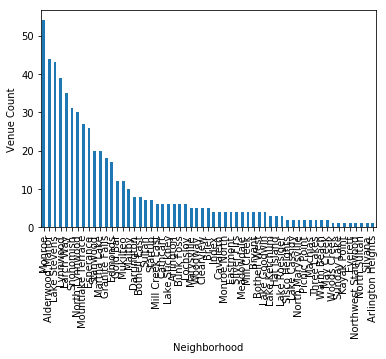

In [66]:
plot2=snohomish_venues["Neighborhood"].value_counts().plot(kind = "bar")
plot2.set_xlabel('Neighborhood')
plot2.set_ylabel('Venue Count')

Now, let's check how many venues were returned for each neighborhood



In [67]:
venue_counts = snohomish_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alderwood Manor,44,44,44,44,44,44
Arlington,6,6,6,6,6,6
Arlington Heights,1,1,1,1,1,1
Bothell East,8,8,8,8,8,8
Bothell West,4,4,4,4,4,4
Brier,5,5,5,5,5,5
Bryant,4,4,4,4,4,4
Bunk Foss,6,6,6,6,6,6
Cathcart,6,6,6,6,6,6


*Let's find out how many unique categories can be curated from all the returned venues

In [68]:
print('There are {} uniques categories.'.format(len(snohomish_venues['Venue Category'].unique())))

There are 175 uniques categories.


<h2>Let's Analyze Each Neighborhood in Snohomish County, WA.</h2>

In [69]:
# one hot encoding
snohomish_onehot = pd.get_dummies(king_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
snohomish_onehot['Neighborhood'] = snohomish_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [snohomish_onehot.columns[-1]] + list(snohomish_onehot.columns[:-1])
snohomish_onehot = snohomish_onehot[fixed_columns]

snohomish_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Emergency Room,English Restaurant,Ethiopian Restaurant,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Multiplex,Music Store,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Travel & Transport,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Lake Cassidy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lake Cassidy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [70]:
snohomish_onehot.shape
print('The dataframe has', snohomish_onehot.shape, 'rows and columns respectively.')

The dataframe has (1174, 244) rows and columns respectively.


**Next, let's group rows by neighborhood by taking the mean of the frequency of occurrence of each category**

In [71]:
snohomish_grouped = snohomish_onehot.groupby('Neighborhood').mean().reset_index()
snohomish_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Airport,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Trail,Boat or Ferry,Bookstore,Botanical Garden,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Emergency Room,English Restaurant,Ethiopian Restaurant,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gay Bar,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,History Museum,Home Service,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Inn,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Lawyer,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Malay Restaurant,Marijuana Dispensary,Market,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Motorsports Shop,Movie Theater,Multiplex,Music Store,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Other Repair Shop,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pawn Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Print Shop,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Restaurant,River,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Soccer Field,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Train,Travel & Transport,Used Bookstore,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Alderwood Manor,0.022727,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.022727,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.022727,0.000000,0.0,0.000000,0.045455,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.022727,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.045455,0.000000,0.0,0.000000,0.000000,0.068182,0.0,0.000000,0.000000,0.000000,0.022727,0.0,0.0,0.0,0.022727,0.0,0.000000,0.000000,0.045455,0.0,0.022727,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,

<h3>Let's print each neighborhood along with the top 5 most common venues</h3>

In [72]:
num_top_venues = 5

for hood in snohomish_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = snohomish_grouped[snohomish_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alderwood Manor----
             venue  freq
0      Coffee Shop  0.07
1            Diner  0.05
2             Bank  0.05
3    Grocery Store  0.05
4  Thai Restaurant  0.05


----Arlington----
           venue  freq
0  Boat or Ferry  0.17
1          Beach  0.17
2    Bus Station  0.17
3          Trail  0.17
4           Farm  0.17


----Arlington Heights----
                      venue  freq
0               Coffee Shop   1.0
1                       ATM   0.0
2                Nail Salon   0.0
3            Medical Center   0.0
4  Mediterranean Restaurant   0.0


----Bothell East----
         venue  freq
0         Park  0.25
1     Bus Stop  0.25
2  Coffee Shop  0.12
3        Beach  0.12
4   Kids Store  0.12


----Bothell West----
                        venue  freq
0  Construction & Landscaping  0.25
1              Farmers Market  0.25
2                        Farm  0.25
3              Sandwich Place  0.25
4                 Music Store  0.00


----Brier----
                venue  freq
0   

<h3>Let's put this info into a pandas dataframe:</h3>
*First, let's write a function to sort the venues in descending order.

In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

*and, let's create the new dataframe and display the top 10 venues for each neighborhood.

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = snohomish_grouped['Neighborhood']

for ind in np.arange(snohomish_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(snohomish_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alderwood Manor,Coffee Shop,Park,Chinese Restaurant,Bank,Grocery Store,Diner,Rental Car Location,Thai Restaurant,Pharmacy,Pet Store
1,Arlington,Farm,Beach,Boat or Ferry,Playground,Bus Station,Trail,Duty-free Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant
2,Arlington Heights,Coffee Shop,Community Center,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
3,Bothell East,Bus Stop,Park,Food,Coffee Shop,Beach,Kids Store,Electronics Store,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant
4,Bothell West,Construction & Landscaping,Sandwich Place,Farm,Farmers Market,Credit Union,Creperie,Convenience Store,Fabric Shop,Ethiopian Restaurant,English Restaurant


In [75]:
neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')

The dataframe has (59, 11) rows and columns respectively.


<h2>Let's Cluster the Neighborhoods in Snohomish County</h2>

**Run k-means to cluster the neighborhood into 5 clusters.*

In [76]:
# set number of clusters
kclusters = 5

snohomish_grouped_clustering = snohomish_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(snohomish_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.*

In [77]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

snohomish_merged = snohomish_data

# merge snohomish_grouped with snohomish_data to add latitude/longitude for each neighborhood
snohomish_merged = snohomish_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

snohomish_merged.head() # check the last columns!

,Neighborhood,State,density,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lake Cassidy,WA,131.0,Snohomish,48.0639,-122.0920,0.0,Home Service,Thrift / Vintage Store,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
7,Three Lakes,WA,112.0,Snohomish,47.9420,-121.9924,0.0,Restaurant,Baseball Field,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
19,Cathcart,WA,250.0,Snohomish,47.8525,-122.1058,0.0,Coffee Shop,Deli / Bodega,Pizza Place,Frozen Yogurt Shop,Grocery Store,Park,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
41,Monroe North,WA,282.0,Snohomish,47.8830,-121.9882,0.0,Farmers Market,Pharmacy,Bar,Ice Cream Shop,Dog Run,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
53,Arlington Heights,WA,129.0,Snohomish,48.2119,-122.0630,0.0,Coffee Shop,Community Center,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant


<h3>* Let's visualize the resultung clusters</h3>

In [78]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(snohomish_merged['Latitude'], snohomish_merged['Longitude'], snohomish_merged['Neighborhood'], king_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Examine Clusters</h2>

In [79]:
snohomish_merged

,Neighborhood,State,density,County,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lake Cassidy,WA,131.0,Snohomish,48.0639,-122.0920,0.0,Home Service,Thrift / Vintage Store,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
7,Three Lakes,WA,112.0,Snohomish,47.9420,-121.9924,0.0,Restaurant,Baseball Field,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
19,Cathcart,WA,250.0,Snohomish,47.8525,-122.1058,0.0,Coffee Shop,Deli / Bodega,Pizza Place,Frozen Yogurt Shop,Grocery Store,Park,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
41,Monroe North,WA,282.0,Snohomish,47.8830,-121.9882,0.0,Farmers Market,Pharmacy,Bar,Ice Cream Shop,Dog Run,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
53,Arlington Heights,WA,129.0,Snohomish,48.2119,-122.0630,0.0,Coffee Shop,Community Center,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
68,Edmonds,WA,1829.0,Snohomish,47.8114,-122.3533,0.0,Video Store,Gas Station,Pharmacy,Thrift / Vintage Store,Convenience Store,Pizza Place,Casino,Salon / Barbershop,Sandwich Place,Bar
73,Darrington,WA,306.0,Snohomish,48.2546,-121.6029,0.0,Fast Food Restaurant,Korean Restaurant,Mediterranean Restaurant,Sandwich Place,Supermarket,Storage Facility,Casino,Baseball Field,Electronics Store,Dry Cleaner
80,Lake Roesiger,WA,64.0,Snohomish,47.9839,-121.9129,0.0,Bus Station,Japanese Restaurant,Mobile Phone Shop,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
102,Lake Ketchum,WA,166.0,Snohomish,48.2820,-122.3480,0.0,American Restaurant,Casino,Yoga Studio,Dog Run,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
107,Lake Stickney,WA,2441.0,Snohomish,47.8709,-122.2596,0.0,Intersection,Coffee Shop,Music Store,Credit Union,Park,Yoga Studio,Duty-free Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant


<h3>Cluster 1</h3>

In [80]:
snohomish_merged.loc[snohomish_merged['Cluster Labels'] == 0, snohomish_merged.columns[[0] + list(range(5, snohomish_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Lake Cassidy,-122.0920,0.0,Home Service,Thrift / Vintage Store,Yoga Studio,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store
7,Three Lakes,-121.9924,0.0,Restaurant,Baseball Field,Dive Bar,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
19,Cathcart,-122.1058,0.0,Coffee Shop,Deli / Bodega,Pizza Place,Frozen Yogurt Shop,Grocery Store,Park,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant
41,Monroe North,-121.9882,0.0,Farmers Market,Pharmacy,Bar,Ice Cream Shop,Dog Run,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
53,Arlington Heights,-122.0630,0.0,Coffee Shop,Community Center,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
68,Edmonds,-122.3533,0.0,Video Store,Gas Station,Pharmacy,Thrift / Vintage Store,Convenience Store,Pizza Place,Casino,Salon / Barbershop,Sandwich Place,Bar
73,Darrington,-121.6029,0.0,Fast Food Restaurant,Korean Restaurant,Mediterranean Restaurant,Sandwich Place,Supermarket,Storage Facility,Casino,Baseball Field,Electronics Store,Dry Cleaner
80,Lake Roesiger,-121.9129,0.0,Bus Station,Japanese Restaurant,Mobile Phone Shop,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
102,Lake Ketchum,-122.3480,0.0,American Restaurant,Casino,Yoga Studio,Dog Run,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room
107,Lake Stickney,-122.2596,0.0,Intersection,Coffee Shop,Music Store,Credit Union,Park,Yoga Studio,Duty-free Shop,Donut Shop,Dry Cleaner,Dumpling Restaurant


<h3>Cluster 2</h3>

In [81]:
snohomish_merged.loc[snohomish_merged['Cluster Labels'] == 1, snohomish_merged.columns[[0] + list(range(5, snohomish_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
195,Woods Creek,-121.8982,1.0,Pie Shop,Fast Food Restaurant,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant,Duty-free Shop


<h3>Cluster 3</h3>

In [82]:
snohomish_merged.loc[snohomish_merged['Cluster Labels'] == 2, snohomish_merged.columns[[0] + list(range(5, snohomish_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
178,Northwest Stanwood,-122.3501,2.0,Speakeasy,Yoga Studio,Dog Run,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store


<h3>Cluster 4</h3>

In [83]:
snohomish_merged.loc[snohomish_merged['Cluster Labels'] == 3, snohomish_merged.columns[[0] + list(range(5, snohomish_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
109,Everett,-122.167,3.0,Taco Place,Yoga Studio,Dog Run,Farmers Market,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store


<h3>Cluster 5</h3>

In [84]:
snohomish_merged.loc[snohomish_merged['Cluster Labels'] == 4, snohomish_merged.columns[[0] + list(range(5, snohomish_merged.shape[1]))]]

,Neighborhood,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
282,Kayak Point,-122.3342,4.0,Pharmacy,Fast Food Restaurant,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant,Duty-free Shop
497,Machias,-122.0515,4.0,Pharmacy,Video Store,Discount Store,Farm,Fabric Shop,Ethiopian Restaurant,English Restaurant,Emergency Room,Electronics Store,Eastern European Restaurant
